In [1]:
# In the end we will create a requirements.txt file with all the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv(r"EHIS_2019_IT\MICRODATI\EHIS_Microdati_2019.txt", sep='\t', encoding='utf-8')
print("Shape:", df.shape)

Shape: (45930, 244)


In [3]:
df.head(5)

,PID2,HHID2,WGT,PROXY,INTMETHOD,SEX,AGE_CLA75,COUNTRY,REG,RIP,...,PROBF5,PROBF6,ASS_SAN,COLF,BABYS,ASSIST,HCOLF,HBABYS,HASSIST,RISECO
0,1,1,1054.076,1,20,1,6,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,2
1,2,1,1054.076,1,20,2,6,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,2
2,3,2,1264.041,1,20,2,7,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,3
3,4,2,1264.041,1,20,1,4,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,3
4,5,2,1264.041,1,20,1,1,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,3


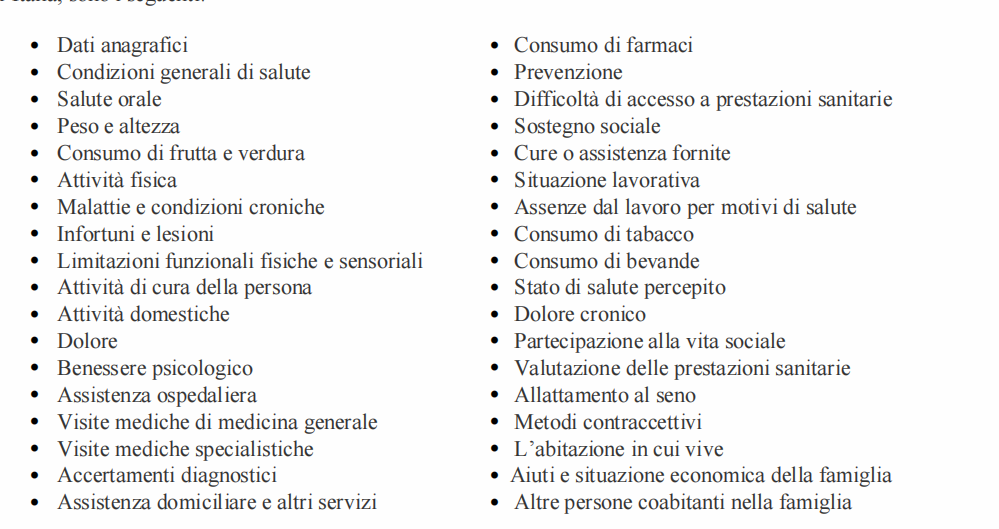

In [4]:
# df to csv
#df.to_csv(r"EHIS_2019_IT\MICRODATI\EHIS_Microdati_2019.csv", index=False, encoding='utf-8')

In [5]:
# Nomi colonne
print(df.columns.tolist())
# for each col visualize datatype, for readability not on \n but on the same row
for col in df.columns:
    print(f"{col}: {df[col].dtype}", end=", ")

['PID2', 'HHID2', 'WGT', 'PROXY', 'INTMETHOD', 'SEX', 'AGE_CLA75', 'COUNTRY', 'REG', 'RIP', 'BIRTHPLACE2', 'CITIZEN2', 'BIRTHPLACEFATH2', 'BIRTHPLACEMOTH2', 'HATLEVEL4', 'MAINSTAT', 'POSIZ', 'MARSTALEGAL', 'HHNBPERS', 'HHNBPERS_0_13', 'HHTYPE', 'RELPAR', 'TIPNU2', 'NUMNU2', 'RPNUC2', 'HHINCOME', 'REDPR', 'HS1', 'HS2', 'HS3', 'CD1A', 'CD1a1', 'CD1B', 'CD1b1', 'CD1C', 'CD1c1', 'CD1D', 'CD1d1', 'CD1E', 'CD1e1', 'CUORE', 'CUORE1', 'CD1F', 'CD1f1', 'CD1G', 'CD1g1', 'CD1H', 'CD1h1', 'CD1I', 'CD1i1', 'CD1J', 'CD1j1', 'CD1K', 'CD1k1', 'CD1L', 'CD1l1', 'CD1M', 'CD1m1', 'CD1N', 'CD1n1', 'INREN', 'INREN1', 'CD1O', 'CD1o1', 'CD1P', 'CD1p1', 'ANSIA', 'ANSIA1', 'TUMOR', 'TUMOR1', 'ALZH', 'ALZH1', 'PARKIN', 'PARKIN1', 'ALTCRO', 'ALTCRO1', 'CD2', 'AC1A', 'AC1AN', 'AC1B', 'AC1BN', 'AC1C', 'AC1cN', 'AC2', 'AW1', 'AW2', 'PL1', 'PL2', 'PL3', 'PL4', 'PL5', 'PL6', 'PL7', 'PL8', 'PL9', 'PC1A', 'PC1B', 'PC1C', 'PC1D', 'PC1E', 'PC2', 'PC21AB', 'PC21CEF', 'PC21D', 'PC21G', 'PC3', 'PC45', 'HA1A', 'HA1B', 'HA1C',

In [6]:
# Column names are quite vague, on ISTAT website there is a file with the description of the variables, we use mapping to add a brief description to the columns
with open(r"C:\Users\emanu\SL_ISTAT\Lista delle variabili ISTAT.txt", encoding="utf-8") as f:
    descrizioni = [line.strip() for line in f.readlines()]

print("N colonne nel DataFrame:", len(df.columns))
print("N descrizioni nel file ISTAT:", len(descrizioni))
# n rows match so we can procede

N colonne nel DataFrame: 244
N descrizioni nel file ISTAT: 244


In [7]:
mappa_variabili = list(zip(df.columns, descrizioni))

# check if the number of columns and descriptions match
for nome, descrizione in mappa_variabili[:15]:
    print(f"{nome} → {descrizione}")

# Luckily it does, seams like the columns are in the same order as the descriptions in the file

PID2 → Numero identificativo del rispondente
HHID2 → Numero identificativo della famiglia
WGT → Peso di riporto all'universo
PROXY → Risposta proxy
INTMETHOD → Metodo dell'intervista
SEX → Sesso
AGE_CLA75 → Classe di et
COUNTRY → Paese di residenza
REG → Regione
RIP → Ripartizione geografica
BIRTHPLACE2 → Paese di nascita
CITIZEN2 → Cittadinanza
BIRTHPLACEFATH2 → Paese di nascita del padre
BIRTHPLACEMOTH2 → Paese di nascita della madre
HATLEVEL4 → Titolo di studio


In [8]:
df_mapping = pd.DataFrame({
    "Nome_colonna": df.columns,
    "Descrizione_ISTAT": descrizioni
})

output_path = "Mapping_variabili_EHIS_2019.xlsx"
df_mapping.to_excel(output_path, index=False)
print(f"File salvato in: {output_path}")

File salvato in: Mapping_variabili_EHIS_2019.xlsx


We have a lot of variables so it's quite confusing to look at those alltogether, I want to divide them in MacroThemes to allow us to divide our research into topics and maybe perform some cool things later :)

In [9]:
def tema(desc):
    desc = desc.lower()

    # ANAGRAFICA E CONTESTO FAMILIARE
    if any(k in desc for k in [
        'identificativo', 'sesso', 'classe di et', 'paese di residenza', 'regione', 'ripartizione geografica',
        'paese di nascita', 'cittadinanza', 'padre', 'madre', 'stato civile',
        'numero componenti', 'tipo di famiglia', 'relazione di parentela', 'tipo di nucleo',
        'figli', 'allattamento'
    ]):
        return "Anagrafica e contesto familiare"

    # CONDIZIONE SOCIO-ECONOMICA
    if any(k in desc for k in [
        'titolo di studio', 'condizione professionale', 'posizione nella professione',
        'quinti di reddito', 'fonte principale di reddito',
        'colf', 'baby sitter', 'spese abitazione', 'ore settimanali', 'persona che assiste'
    ]):
        return "Condizione socio-economica"

    # SALUTE PERCEPITA
    if 'giudizio sullo stato di salute' in desc or 'salute in generale' in desc or 'salute dei suoi denti' in desc:
        return "Salute percepita"

    # CONDIZIONI CRONICHE E LIMITAZIONI
    if 'croniche:' in desc or 'diagnosticata da un medico' in desc or 'limitazioni che durano' in desc:
        return "Condizioni croniche e limitazioni"

    # INFORTUNI E ASSENZE
    if any(k in desc for k in ['incidente', 'infortunio', 'assenze dal lavoro', 'giorni di assenza']):
        return "Infortuni e assenze"

    # LIMITAZIONI FUNZIONALI E AUTONOMIA
    if any(k in desc for k in ['difficoltà', 'aiuto', 'ausili', 'cura della persona', 'attività domestiche']):
        return "Limitazioni funzionali e autonomia"

    # ACCESSO AI SERVIZI SANITARI
    if any(k in desc for k in [
        'visita', 'cure mediche', 'dentista', 'medico di famiglia', 'specialistica',
        'prenotare', 'lista d attesa', 'spesa', 'assistenza domiciliare',
        'accertamenti diagnostici', 'vaccino', 'farmaci prescritti', 'rinuncia'
    ]):
        return "Accesso ai servizi sanitari"

    # SALUTE MENTALE
    if any(k in desc for k in [
        'depressione', 'ansia', 'scarso interesse', 'sentirsi giù', 'agitazione',
        'energia', 'concentrarsi', 'fallimento', 'problemi ad addormentarsi', 'scarsa opinione di sé'
    ]):
        return "Salute mentale"

    # STILI DI VITA
    if any(k in desc for k in [
        'attività fisica', 'cammina', 'bicicletta', 'sport', 'tempo libero',
        'potenziare i muscoli', 'seduto', 'frutta', 'verdura', 'bevande zuccherate',
        'sigarette', 'fumatore', 'fumo', 'sigaretta elettronica', 'acqua', 'appetito'
    ]):
        return "Stili di vita"

    # SUPPORTO SOCIALE E CAREGIVING
    if any(k in desc for k in [
        'persone vicine', 'attenti a quello che le accade', 'aiuto pratico dai vicini',
        'si prende cura', 'assiste', 'ore a settimana'
    ]):
        return "Supporto sociale e caregiving"

    # CONDIZIONI ABITATIVE
    if any(k in desc for k in [
        'abitazione', 'stanze', 'piano', 'scale', 'ascensore', 'spese abitazione',
        'muffe', 'umidità', 'cattive condizioni'
    ]):
        return "Condizioni abitative"

    # METODO E RILEVAZIONE
    if any(k in desc for k in ['proxy', 'intervista', 'metodo']):
        return "Metodo e rilevazione"

    # TECNICO / PONDERAZIONE
    if any(k in desc for k in ['peso']):
        return "Tecnico / ponderazione"

    return "Altro / Da rivedere"


df_mapping["Tema"] = df_mapping["Descrizione_ISTAT"].apply(tema)

output_path = "Mapping_variabili_EHIS_2019.xlsx"
# we save on same excel file but on a different sheet
with pd.ExcelWriter(output_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_mapping.to_excel(writer, sheet_name="Mapping con Tema", index=False)


This Mapping helped us to gave a general overview of the main themes of our variables, ofc since it's based on keywords it might have some mistake due to context so we review the mapping manually on excel and eventually change something if it's not how we like it, I report those here to allow reproducibility, so if by mistake we rerun the whole things we are not gonna lose all the hardwork done :(

In [10]:
# Manual dictionary to override the tema for some rows that are not correctly classified by the function (Altro / Da rivedere)
override_temi = {

    "HHNBPERS_0_13": "Anagrafica e contesto familiare",
    "NUMNU2": "Anagrafica e contesto familiare",
    "RPNUC2": "Anagrafica e contesto familiare",
    "HS2": "Condizioni croniche e limitazioni",
    "AC1AN": "Infortuni e assenze",
    "AC1BN": "Infortuni e assenze",
    "AC1cN": "Infortuni e assenze",
    "PL1": "Vista / Udito",
    "PL2": "Vista / Udito",
    "PL3": "Vista / Udito",
    "PL4": "Vista / Udito",
    "PL5": "Vista / Udito",
    "PL8": "Limitazioni funzionali e autonomia",
    "PL9": "Limitazioni funzionali e autonomia",
    "PC1A": "Limitazioni funzionali e autonomia",
    "PC1B": "Limitazioni funzionali e autonomia",
    "PC1C": "Limitazioni funzionali e autonomia",
    "PC1D": "Limitazioni funzionali e autonomia",
    "PC1E": "Limitazioni funzionali e autonomia",
    "PC45": "Limitazioni funzionali e autonomia",
    "HA1A": "Limitazioni funzionali e autonomia",
    "HA1B": "Limitazioni funzionali e autonomia",
    "HA1C": "Limitazioni funzionali e autonomia",
    "HA1D": "Limitazioni funzionali e autonomia",
    "HA1E": "Limitazioni funzionali e autonomia",
    "HA1F": "Limitazioni funzionali e autonomia",
    "HA1G": "Limitazioni funzionali e autonomia",
    "HA45": "Limitazioni funzionali e autonomia",
    "PN1": "Salute percepita",
    "PN2": "Salute percepita",
    "MH1A": "Salute percepita",
    "MH1B": "Salute percepita",
    "MH1C": "Salute percepita",
    "MH1D": "Salute percepita",
    "MH1E": "Stili di vita",
    "MH1F": "Salute mentale",
    "MH1G": "Salute mentale",
    "MH1H": "Salute mentale",
    "HO12": "Accesso ai servizi sanitari",
    "AM1": "Accesso ai servizi sanitari",
    "LAVDEN": "Stili di vita",
    "DOVEDENT": "Accesso ai servizi sanitari",
    "VVIC": "Accesso ai servizi sanitari",
    "VECO1": "Accesso ai servizi sanitari",
    "VFID": "Accesso ai servizi sanitari",
    "AM6A": "Accesso ai servizi sanitari",
    "AM6B": "Accesso ai servizi sanitari",
    "AM64": "Accesso ai servizi sanitari",
    "AECO1": "Accesso ai servizi sanitari",
    "AFID": "Accesso ai servizi sanitari",
    "MD1": "Accesso ai servizi sanitari",
    "MD2": "Accesso ai servizi sanitari",
    "PA2": "Accesso ai servizi sanitari",
    "PA3": "Accesso ai servizi sanitari",
    "PA4": "Accesso ai servizi sanitari",
    "PA5": "Accesso ai servizi sanitari",
    "PA6": "Accesso ai servizi sanitari",
    "PA7": "Accesso ai servizi sanitari",
    "MAMSINT": "Accesso ai servizi sanitari",
    "INDMAM": "Accesso ai servizi sanitari",
    "CETAMAM": "Accesso ai servizi sanitari",
    "NMAMMO": "Accesso ai servizi sanitari",
    "PA8": "Accesso ai servizi sanitari",
    "PA89": "Accesso ai servizi sanitari",
    "CETAPAPH": "Accesso ai servizi sanitari",
    "NPAPHPV": "Accesso ai servizi sanitari",
    "UN1A": "Accesso ai servizi sanitari",
    "UN1B": "Accesso ai servizi sanitari",
    "BMI_CLASS": "Stili di vita",
    "PE1": "Stili di vita",
    "PE8": "Stili di vita",
    "DH6": "Stili di vita",
    "FUMO": "Stili di vita",
    "SK4_CL": "Stili di vita",
    "CETAFU": "Stili di vita",
    "ABUSO": "Stili di vita",
    "RISCHIO": "Stili di vita",
    "SS1": "Stili di vita",
    "SS3": "Supporto sociale e caregiving",
    "PROBF4": "Condizioni abitative",
    "ASS_SAN": "Condizione socio-economica",
    "COLF": "Condizioni abitative",
    "RISECO": "Condizione socio-economica",
}

df_mapping["Tema"] = df_mapping.apply(
    lambda row: override_temi.get(row["Nome_colonna"], row["Tema"]),
    axis=1
)
df_mapping.to_excel(output_path, sheet_name="Mapping con Tema", index=False)
print(f"File aggiornato e salvato in: {output_path}")

File aggiornato e salvato in: Mapping_variabili_EHIS_2019.xlsx


Yeah this took a lot but it's complitely worth it

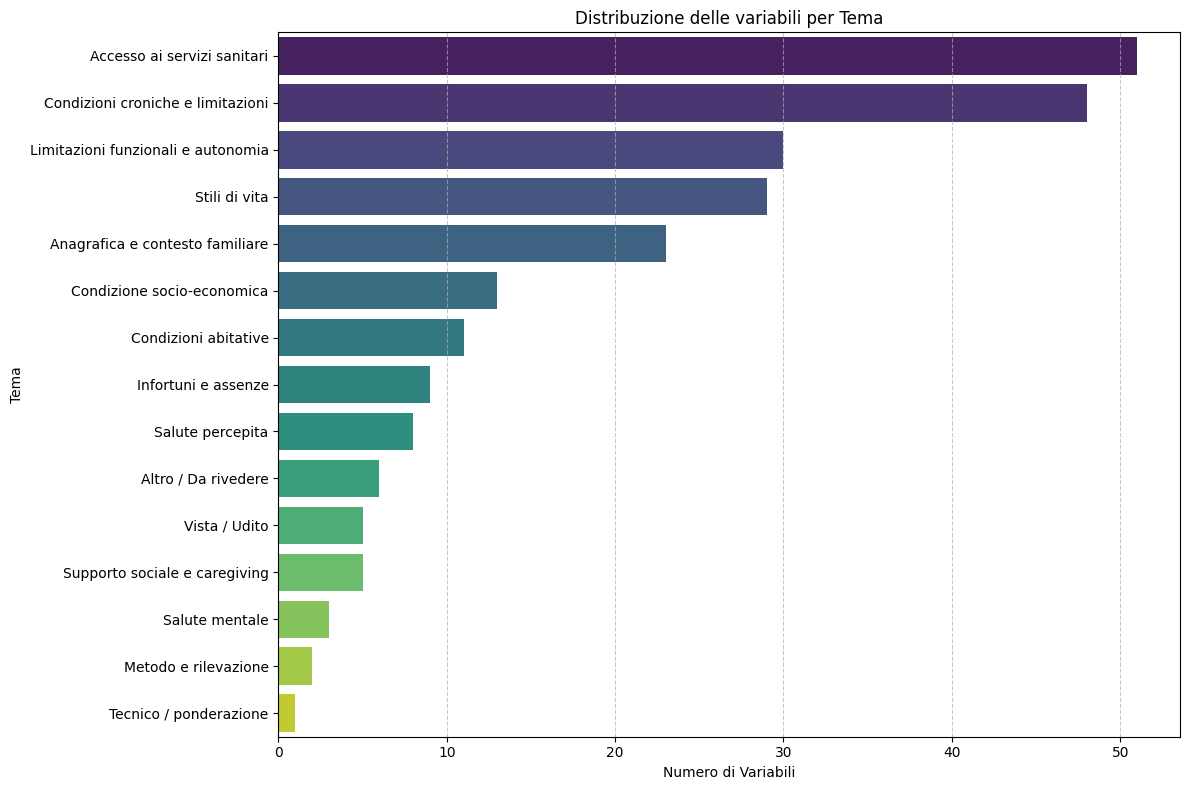

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

tema_counts = df_mapping['Tema'].value_counts().reset_index()
tema_counts.columns = ['Tema', 'Count']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=tema_counts, y='Tema', x='Count', hue='Tema', palette='viridis', dodge=False, legend=False)
plt.title('Distribuzione delle variabili per Tema')
plt.xlabel('Numero di Variabili')
plt.ylabel('Tema')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


In [12]:
def extract_df_by_tema(df, df_mapping, tema):
    colonne_tema = df_mapping[df_mapping["Tema"] == tema]["Nome_colonna"].tolist()
    colonne_presenti = [col for col in colonne_tema if col in df.columns]
    return df[colonne_presenti]


### Some adjustment on themes
Made while working on the themes itself

In [13]:
# HATLEVEL4 to condizione socio-economica


# Tecnico / Ponderazione

In [14]:
tema_scelto = "Tecnico / ponderazione"
df_tema_tecnico_ponderazione = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_tecnico_ponderazione.head()

,WGT
0,1054.076
1,1054.076
2,1264.041
3,1264.041
4,1264.041


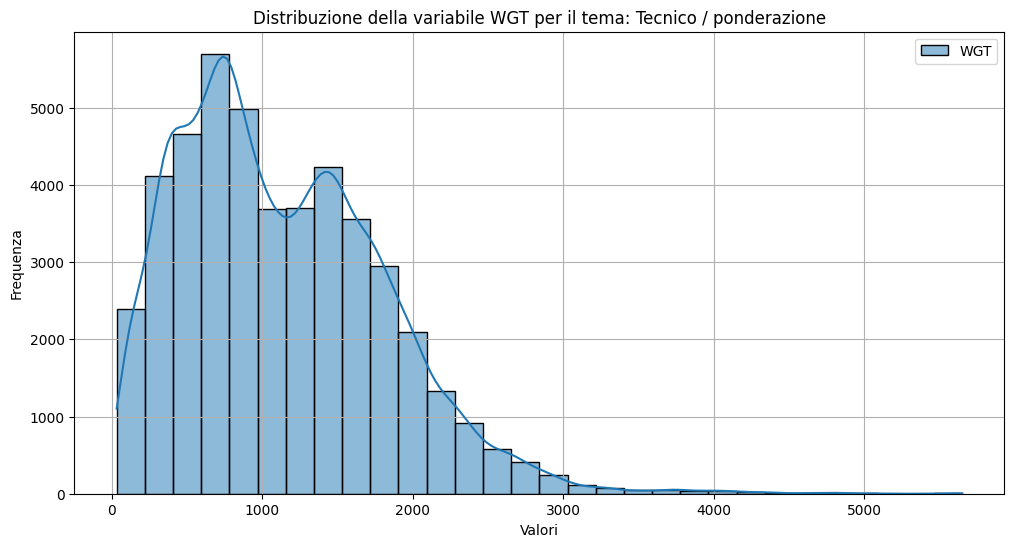

In [15]:
# show distributtion
plt.figure(figsize=(12, 6))
sns.histplot(df_tema_tecnico_ponderazione, kde=True, bins=30)
plt.title(f'Distribuzione della variabile WGT per il tema: {tema_scelto}')
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()

# Metodo e Rilevazione

In [16]:
tema_scelto = "Metodo e rilevazione"
df_tema_metodo_rilevazione = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_metodo_rilevazione.head()

,PROXY,INTMETHOD
0,1,20
1,1,20
2,1,20
3,1,20
4,1,20


In [17]:
df_tema_metodo_rilevazione['PROXY'].value_counts()

PROXY
1    39351
2     6579
Name: count, dtype: int64

Codifica se la risposta è stata fornita direttamente o da un altro membro (proxy interview) → condiziona la qualità dei dati

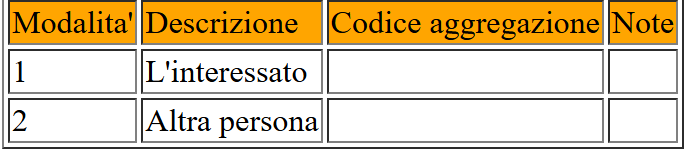

In [18]:
df_tema_metodo_rilevazione['INTMETHOD'].value_counts()
# Face-to-face, non-electronic version 

INTMETHOD
20    45930
Name: count, dtype: int64

In [19]:
# we have only one value for this column, so we can drop it
df = df.drop(columns=['INTMETHOD'])

# Anagrafica e contesto familiare

In [20]:
tema_scelto = "Anagrafica e contesto familiare"
df_tema_anagrafe_famiglia = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_anagrafe_famiglia.head()

,PID2,HHID2,SEX,AGE_CLA75,COUNTRY,REG,RIP,BIRTHPLACE2,CITIZEN2,BIRTHPLACEFATH2,...,HHNBPERS_0_13,HHTYPE,RELPAR,TIPNU2,NUMNU2,RPNUC2,FIGLI_N,ALSENO,DALSENO,DALLESC
0,1,1,1,6,IT,10,1,20,20,20,...,0,4,1,1,1,2,-2,-2,-2,-2
1,2,1,2,6,IT,10,1,20,20,20,...,0,4,2,1,1,1,2,-2,-2,-2
2,3,2,2,7,IT,10,1,20,20,20,...,0,3,1,2,1,1,-2,-2,-2,-2
3,4,2,1,4,IT,10,1,20,20,20,...,0,3,2,2,1,2,-2,-2,-2,-2
4,5,2,1,1,IT,10,1,10,20,20,...,0,3,6,2,1,3,-2,-2,-2,-2


In [21]:
df_tema_anagrafe_famiglia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45930 entries, 0 to 45929
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PID2             45930 non-null  int64 
 1   HHID2            45930 non-null  int64 
 2   SEX              45930 non-null  int64 
 3   AGE_CLA75        45930 non-null  int64 
 4   COUNTRY          45930 non-null  object
 5   REG              45930 non-null  int64 
 6   RIP              45930 non-null  int64 
 7   BIRTHPLACE2      45930 non-null  int64 
 8   CITIZEN2         45930 non-null  int64 
 9   BIRTHPLACEFATH2  45930 non-null  int64 
 10  BIRTHPLACEMOTH2  45930 non-null  int64 
 11  MARSTALEGAL      45930 non-null  int64 
 12  HHNBPERS         45930 non-null  int64 
 13  HHNBPERS_0_13    45930 non-null  int64 
 14  HHTYPE           45930 non-null  int64 
 15  RELPAR           45930 non-null  int64 
 16  TIPNU2           45930 non-null  int64 
 17  NUMNU2           45930 non-null

### Household info (Nucleo Familiare)

In [22]:
print("Unique PID2 count:", df_tema_anagrafe_famiglia['PID2'].nunique())
# identificativo univoco dell’individuo
print("Unique HHID2 count:", df_tema_anagrafe_famiglia['HHID2'].nunique())
# identificativo univoco della famiglia di fatto (ff)

Unique PID2 count: 45930
Unique HHID2 count: 22792


In [23]:
household_df = df_tema_anagrafe_famiglia[['HHID2', 'PID2']]
household_sizes = household_df.groupby('HHID2').size().reset_index(name='HouseholdSize')

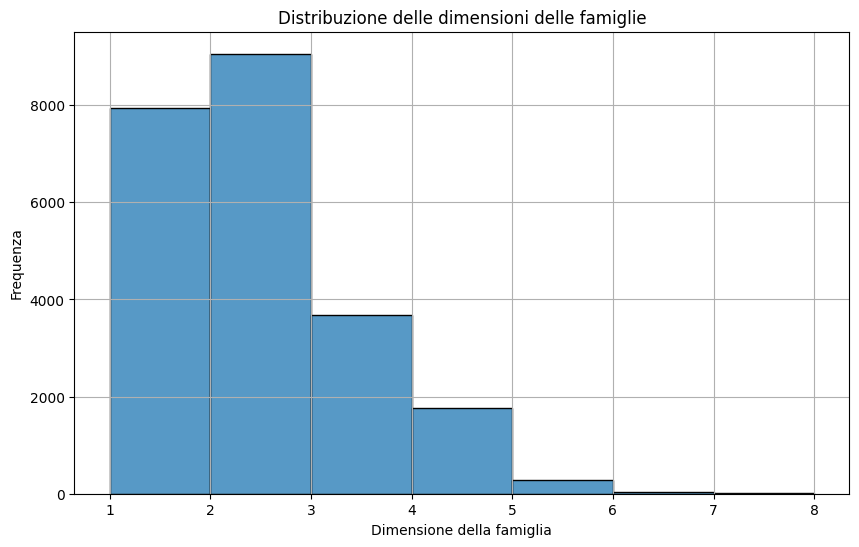

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(household_sizes['HouseholdSize'], bins=range(1, household_sizes['HouseholdSize'].max() + 2), kde=False)
plt.title('Distribuzione delle dimensioni delle famiglie')
plt.xlabel('Dimensione della famiglia')
plt.ylabel('Frequenza')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [ ]:
# PID2 behave like the index + 1, we can remove it
df_tema_anagrafe_famiglia = df_tema_anagrafe_famiglia.drop(columns=['PID2'])
df = df.drop(columns=['PID2'])

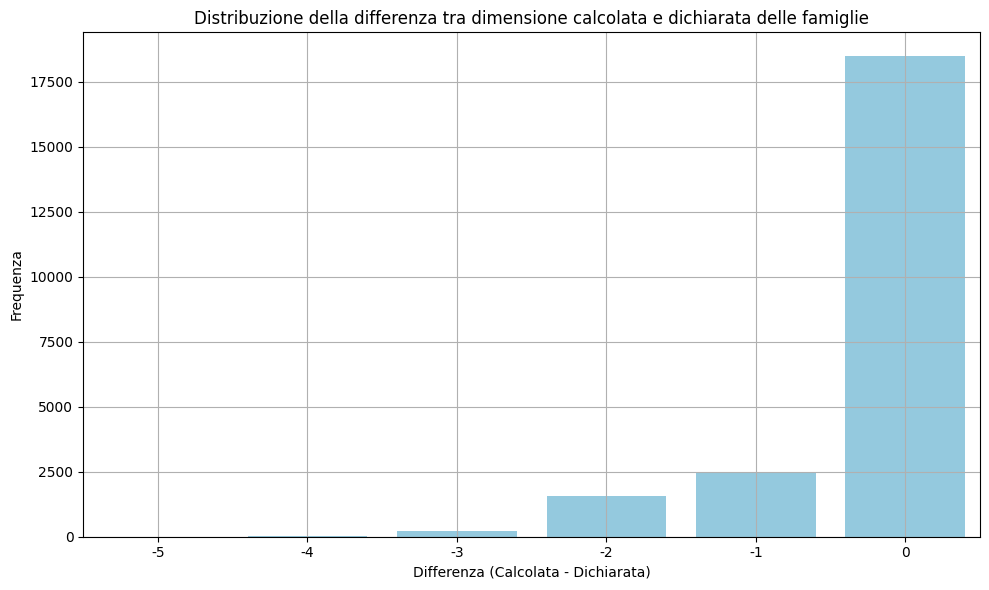


Distribuzione 'Differenza (Calcolata - Dichiarata)':
18484

Distribuzione 'ExplainedByChildren':
ExplainedByChildren
True     22059
False      733
Name: count, dtype: int64


In [81]:
df_household_check = df_tema_anagrafe_famiglia[['HHID2', 'HHNBPERS', 'HHNBPERS_0_13']] # Var n° 19-20
computed_sizes = df_household_check.groupby('HHID2').size().reset_index(name='ComputedSize')
reported_sizes = df_household_check.drop_duplicates(subset='HHID2')[['HHID2', 'HHNBPERS', 'HHNBPERS_0_13']]
size_comparison = pd.merge(computed_sizes, reported_sizes, on='HHID2')

size_comparison['Difference'] = size_comparison['ComputedSize'] - size_comparison['HHNBPERS']
size_comparison['ExplainedByChildren'] = (size_comparison['Difference'] + size_comparison['HHNBPERS_0_13']) == 0
diff_counts = size_comparison['Difference'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=diff_counts.index, y=diff_counts.values, color='skyblue')
plt.title('Distribuzione della differenza tra dimensione calcolata e dichiarata delle famiglie')
plt.xlabel('Differenza (Calcolata - Dichiarata)')
plt.ylabel('Frequenza')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nDistribuzione 'Differenza (Calcolata - Dichiarata)':")
print(size_comparison['Difference'].value_counts().get(0, 0))  
print("\nDistribuzione 'ExplainedByChildren':")
print(size_comparison['ExplainedByChildren'].value_counts())



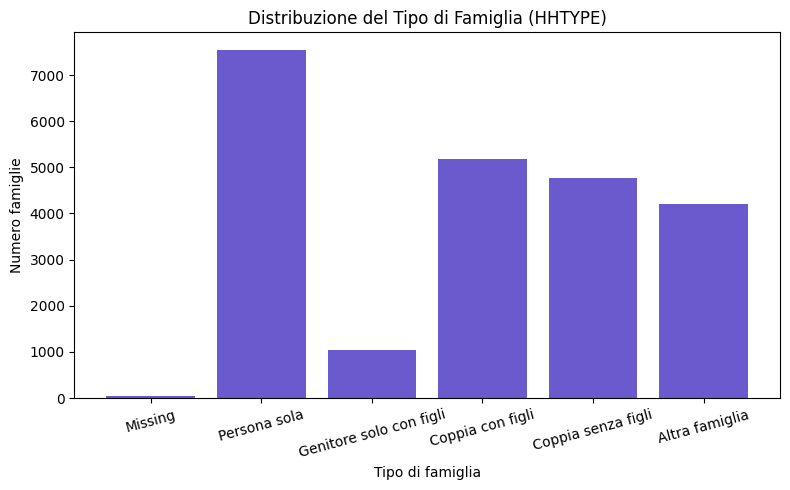

In [86]:
hhtype_labels = {
    -1: "Missing",
    1: "Persona sola",
    2: "Genitore solo con figli",
    3: "Coppia con figli",
    4: "Coppia senza figli",
    5: "Altra famiglia"
}

# Estrai una riga per famiglia
df_fam_types = df_tema_anagrafe_famiglia[['HHID2', 'HHTYPE']].drop_duplicates(subset='HHID2')

# Conta e mappa le etichette
hhtype_counts = df_fam_types['HHTYPE'].value_counts().sort_index()
labels = [hhtype_labels.get(code, str(code)) for code in hhtype_counts.index]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, hhtype_counts.values, color='slateblue')
plt.title("Distribuzione del Tipo di Famiglia (HHTYPE)")
plt.xlabel("Tipo di famiglia")
plt.ylabel("Numero famiglie")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



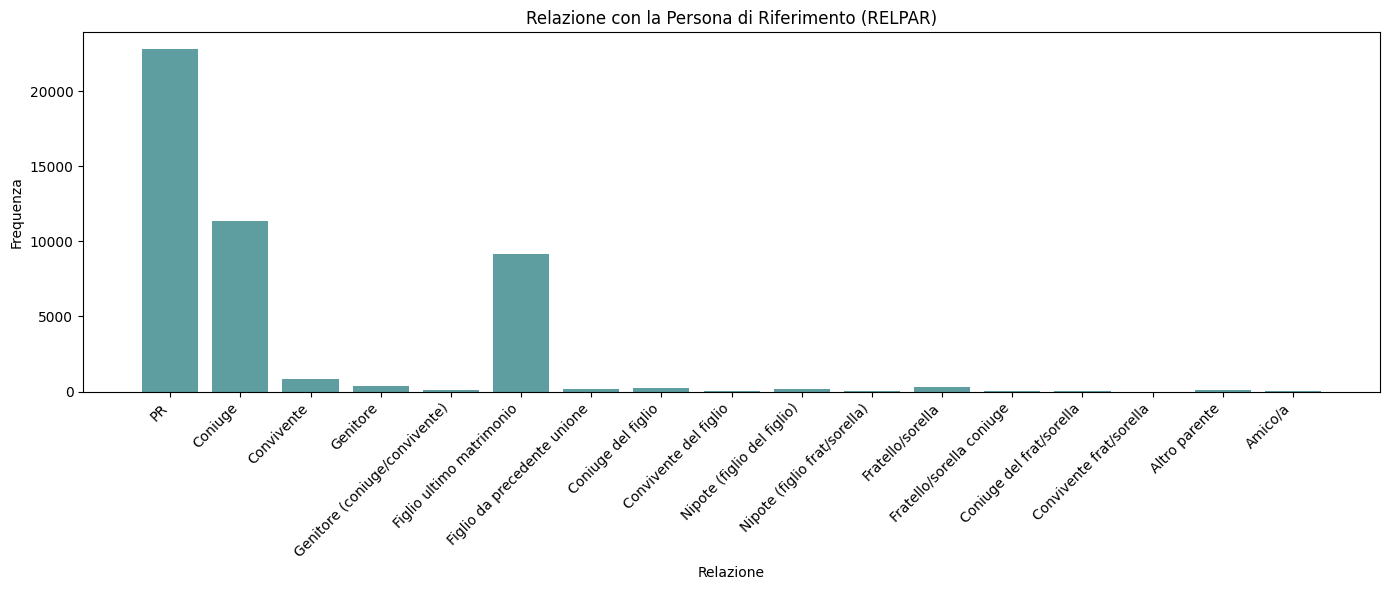

In [87]:
relpar_labels = {
    1: "PR",
    2: "Coniuge",
    3: "Convivente",
    4: "Genitore",
    5: "Genitore (coniuge/convivente)",
    6: "Figlio ultimo matrimonio",
    7: "Figlio da precedente unione",
    8: "Coniuge del figlio",
    9: "Convivente del figlio",
    10: "Nipote (figlio del figlio)",
    11: "Nipote (figlio frat/sorella)",
    12: "Fratello/sorella",
    13: "Fratello/sorella coniuge",
    14: "Coniuge del frat/sorella",
    15: "Convivente frat/sorella",
    16: "Altro parente",
    17: "Amico/a",
   -1: "Missing"
}

# Conta valori
relpar_counts = df_tema_anagrafe_famiglia['RELPAR'].value_counts().sort_index()
relpar_names = [relpar_labels.get(code, str(code)) for code in relpar_counts.index]

# Plot RELPAR
plt.figure(figsize=(14, 6))
plt.bar(relpar_names, relpar_counts.values, color='cadetblue')
plt.title("Relazione con la Persona di Riferimento (RELPAR)")
plt.xlabel("Relazione")
plt.ylabel("Frequenza")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [88]:
relpar_counts

RELPAR
1     22792
2     11362
3       850
4       398
5       105
6      9188
7       180
8       204
9        49
10      195
11       67
12      330
13       29
14       23
15        1
16      105
17       52
Name: count, dtype: int64

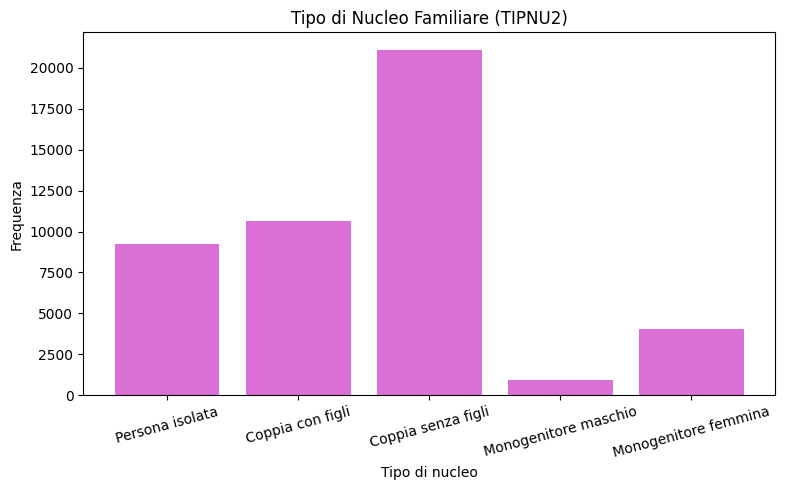

In [89]:
tipnu2_labels = {
    0: "Persona isolata",
    1: "Coppia con figli",
    2: "Coppia senza figli",
    3: "Monogenitore maschio",
    4: "Monogenitore femmina"
}

# Conta valori
tipnu2_counts = df_tema_anagrafe_famiglia['TIPNU2'].value_counts().sort_index()
tipnu2_names = [tipnu2_labels.get(code, str(code)) for code in tipnu2_counts.index]

# Plot TIPNU2
plt.figure(figsize=(8, 5))
plt.bar(tipnu2_names, tipnu2_counts.values, color='orchid')
plt.title("Tipo di Nucleo Familiare (TIPNU2)")
plt.xlabel("Tipo di nucleo")
plt.ylabel("Frequenza")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


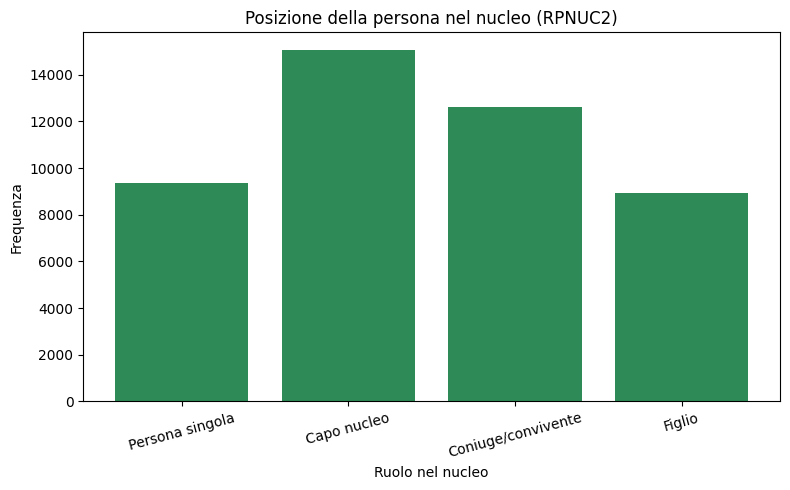

In [95]:
rp_labels = {
    0: "Persona singola",
    1: "Capo nucleo",
    2: "Coniuge/convivente",
    3: "Figlio"
}


# Conta e mappa etichette
rp_counts = df_tema_anagrafe_famiglia['RPNUC2'].value_counts().sort_index()
rp_names = [rp_labels.get(code, str(code)) for code in rp_counts.index]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(rp_names, rp_counts.values, color='seagreen')
plt.title("Posizione della persona nel nucleo (RPNUC2)")
plt.xlabel("Ruolo nel nucleo")
plt.ylabel("Frequenza")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [90]:
tipnu2_counts

TIPNU2
0     9242
1    10633
2    21105
3      906
4     4044
Name: count, dtype: int64

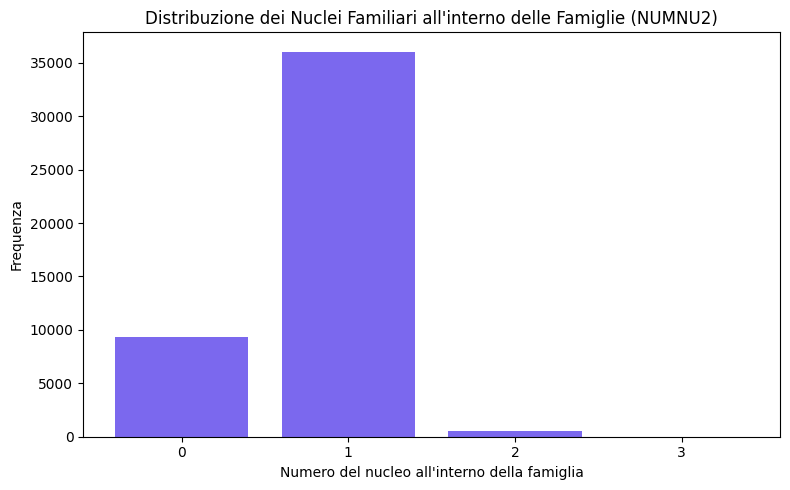

In [91]:
numnu2_counts = df_tema_anagrafe_famiglia['NUMNU2'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(numnu2_counts.index.astype(str), numnu2_counts.values, color='mediumslateblue')
plt.title("Distribuzione dei Nuclei Familiari all'interno delle Famiglie (NUMNU2)")
plt.xlabel("Numero del nucleo all'interno della famiglia")
plt.ylabel("Frequenza")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


| NUMNU2 | Significato operativo                                                                                                                                                                                                      |
| ------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 0      | Persona **senza nucleo associato** (es. persona isolata, ospite, convivente non incluso)                                                                                                                                   |
| 1      | **Primo nucleo familiare** della famiglia di fatto (standard)                                                                                                                                                              |
| 2, 3…  | **Nuclei aggiuntivi** presenti nella stessa famiglia (`HHID2`) – indicano **famiglie complesse** con più nuclei interni (es. due fratelli sposati con figli che vivono insieme, con due nuclei distinti ma stesso `HHID2`) |


In [94]:
numnu2_counts

NUMNU2
0     9339
1    36056
2      526
3        9
Name: count, dtype: int64

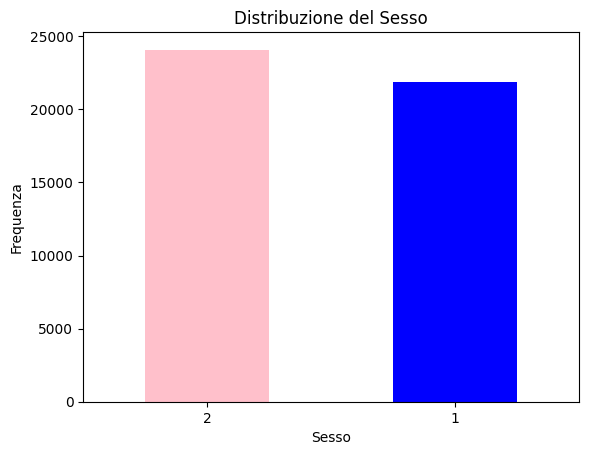

In [28]:
# Question 1.2 Questionario Giallo
df_tema_anagrafe_famiglia['SEX'].value_counts().plot(kind='bar', color=['pink', 'blue'])
plt.title('Distribuzione del Sesso')
plt.xlabel('Sesso')
plt.ylabel('Frequenza')
plt.xticks(rotation=0)
plt.show()

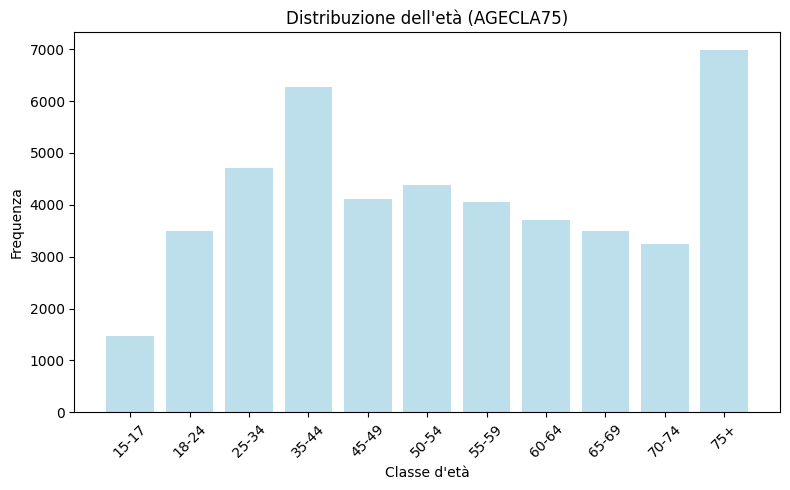

In [29]:
# Question 1.3 Questionario Giallo
age_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
age_labels = [
    '15-17', '18-24', '25-34', '35-44', '45-49', '50-54',
    '55-59', '60-64', '65-69', '70-74', '75+'
]
age_counts = df_tema_anagrafe_famiglia['AGE_CLA75'].value_counts().reindex(age_order)

plt.figure(figsize=(8, 5))
plt.bar(x=age_labels, height=age_counts, color='lightblue', alpha=0.8)
plt.title("Distribuzione dell'età (AGECLA75)")
plt.xlabel("Classe d'età")
plt.ylabel("Frequenza")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
country_counts = df_tema_anagrafe_famiglia['COUNTRY'].value_counts().reset_index()
country_counts
# variabile inutile analiticamente

,COUNTRY,count
0,IT,45930


In [31]:
df_tema_anagrafe_famiglia = df_tema_anagrafe_famiglia.drop(columns=['COUNTRY'])
df = df.drop(columns=['COUNTRY'])

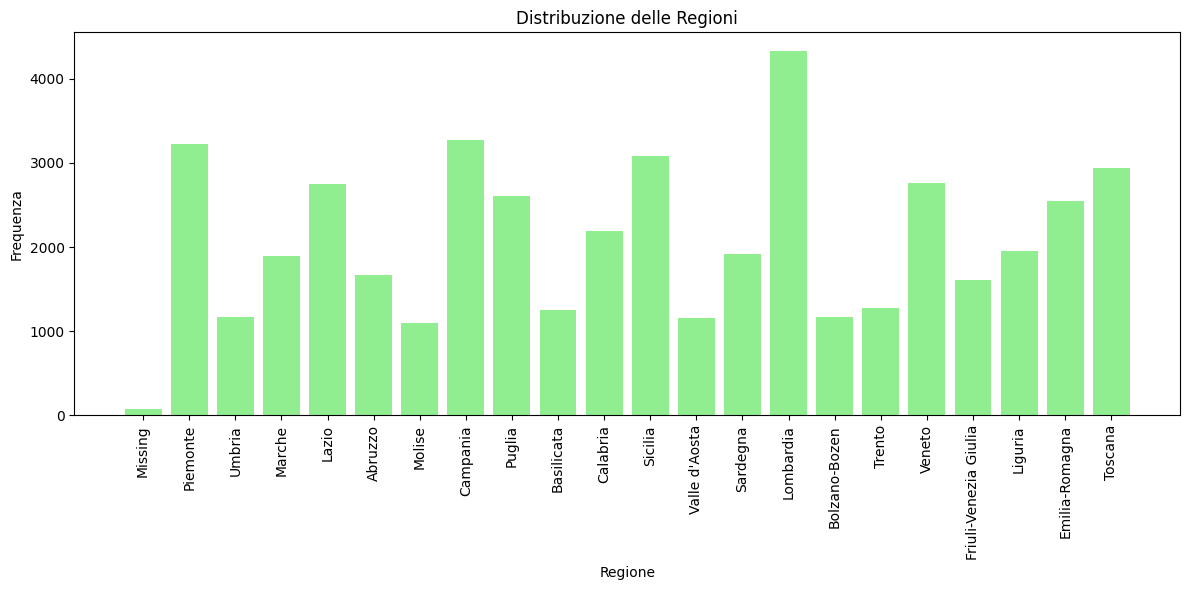

In [32]:
reg_labels = {
    '-1': 'Missing',
    '10': 'Piemonte', '20': "Valle d'Aosta", '30': 'Lombardia',
    '41': 'Bolzano-Bozen', '42': 'Trento', '50': 'Veneto',
    '60': 'Friuli-Venezia Giulia', '70': 'Liguria', '80': 'Emilia-Romagna',
    '90': 'Toscana', '100': 'Umbria', '110': 'Marche', '120': 'Lazio',
    '130': 'Abruzzo', '140': 'Molise', '150': 'Campania', '160': 'Puglia',
    '170': 'Basilicata', '180': 'Calabria', '190': 'Sicilia', '200': 'Sardegna'
}

reg_counts = df_tema_anagrafe_famiglia['REG'].astype(str).value_counts()
reg_counts = reg_counts.sort_index()  # order by code

labels = [reg_labels.get(code, code) for code in reg_counts.index]
values = reg_counts.values

plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='lightgreen')
plt.title("Distribuzione delle Regioni")
plt.xlabel("Regione")
plt.ylabel("Frequenza")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

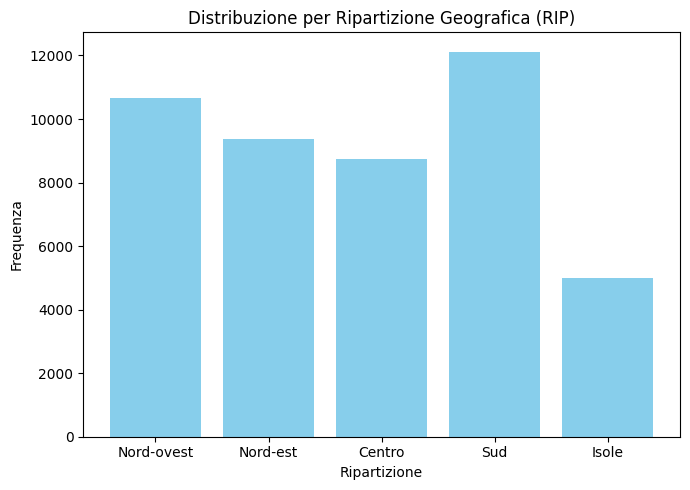

In [33]:
rip_labels = {
    1: "Nord-ovest",
    2: "Nord-est",
    3: "Centro",
    4: "Sud",
    5: "Isole"
}

rip_counts = df_tema_anagrafe_famiglia['RIP'].value_counts().sort_index()

labels = [rip_labels.get(code, str(code)) for code in rip_counts.index]
values = rip_counts.values

plt.figure(figsize=(7, 5))
plt.bar(labels, values, color='skyblue')
plt.title("Distribuzione per Ripartizione Geografica (RIP)")
plt.xlabel("Ripartizione")
plt.ylabel("Frequenza")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


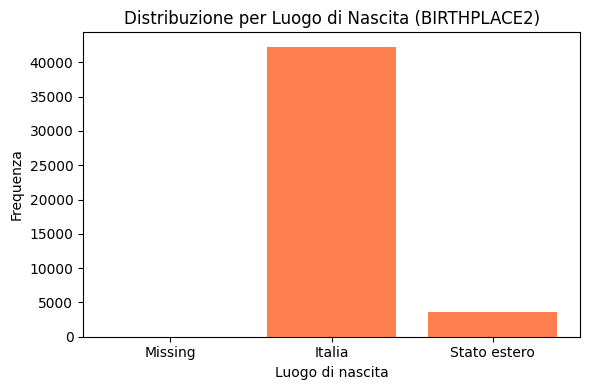

In [34]:
# Question 1.4 Questionario Giallo

birthplace_labels = {
    -1: "Missing",
    10: "Italia",
    20: "Stato estero"
}

birthplace_counts = df_tema_anagrafe_famiglia['BIRTHPLACE2'].value_counts().sort_index()

labels = [birthplace_labels.get(code, str(code)) for code in birthplace_counts.index]
values = birthplace_counts.values

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color='coral')
plt.title("Distribuzione per Luogo di Nascita (BIRTHPLACE2)")
plt.xlabel("Luogo di nascita")
plt.ylabel("Frequenza")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [35]:
birthplace_counts

BIRTHPLACE2
-1         2
 10    42265
 20     3663
Name: count, dtype: int64

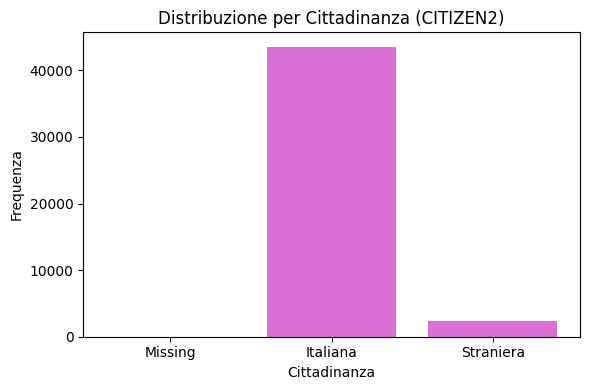

In [36]:
# Question 1.5 Questionario Giallo

citizen_labels = {
    -1: "Missing",
    10: "Italiana",
    20: "Straniera"
}

citizen_counts = df_tema_anagrafe_famiglia['CITIZEN2'].value_counts().sort_index()

labels = [citizen_labels.get(code, str(code)) for code in citizen_counts.index]
values = citizen_counts.values

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color='orchid')
plt.title("Distribuzione per Cittadinanza (CITIZEN2)")
plt.xlabel("Cittadinanza")
plt.ylabel("Frequenza")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [37]:
citizen_counts

CITIZEN2
-1         1
 10    43525
 20     2404
Name: count, dtype: int64

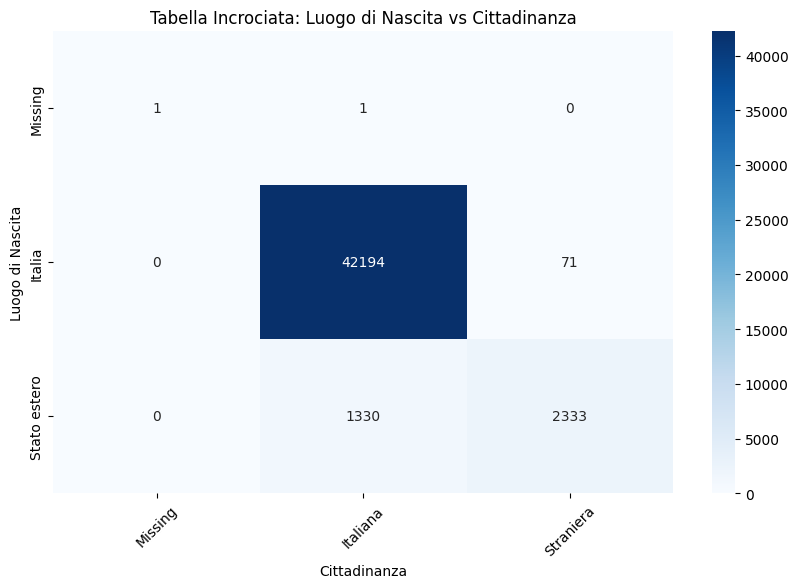

In [38]:
df_birth_citizen = df[['BIRTHPLACE2', 'CITIZEN2']]
cross_tab = pd.crosstab(df_birth_citizen['BIRTHPLACE2'], df_birth_citizen['CITIZEN2'])
cross_tab.index = cross_tab.index.map(birthplace_labels)
cross_tab.columns = cross_tab.columns.map(citizen_labels)

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title("Tabella Incrociata: Luogo di Nascita vs Cittadinanza")
plt.xlabel("Cittadinanza")
plt.ylabel("Luogo di Nascita")
plt.xticks(rotation=45)
plt.show()

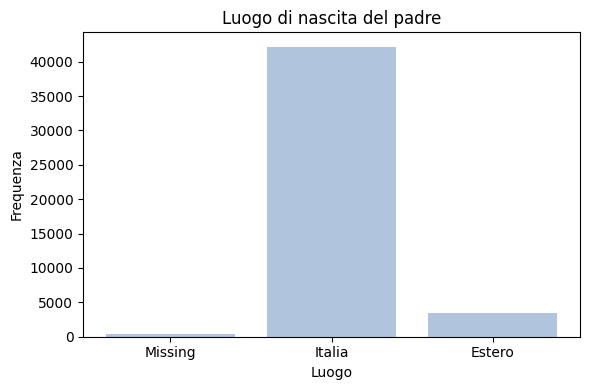

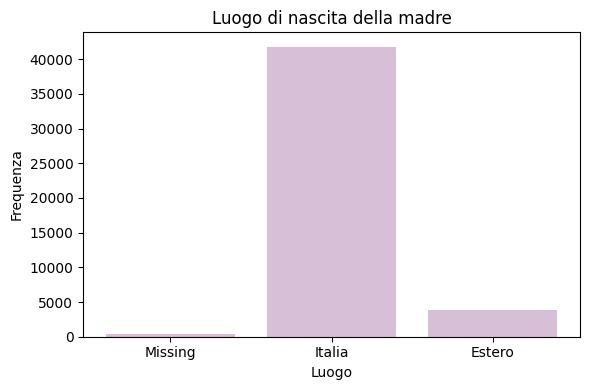

In [39]:
place_map = {-1: "Missing", 10: "Italia", 20: "Estero"}

father_counts = df['BIRTHPLACEFATH2'].value_counts().sort_index()
mother_counts = df['BIRTHPLACEMOTH2'].value_counts().sort_index()

father_labels = [place_map.get(code, str(code)) for code in father_counts.index]
mother_labels = [place_map.get(code, str(code)) for code in mother_counts.index]

plt.figure(figsize=(6, 4))
plt.bar(father_labels, father_counts.values, color='lightsteelblue')
plt.title("Luogo di nascita del padre")
plt.xlabel("Luogo")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(mother_labels, mother_counts.values, color='thistle')
plt.title("Luogo di nascita della madre")
plt.xlabel("Luogo")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.show()


In [40]:
print("Table of counts for BIRTHPLACEFATH2:")
print(father_counts)
print("Table of counts for BIRTHPLACEMOTH2:")
print(mother_counts)

Table of counts for BIRTHPLACEFATH2:
BIRTHPLACEFATH2
-1       353
 10    42157
 20     3420
Name: count, dtype: int64
Table of counts for BIRTHPLACEMOTH2:
BIRTHPLACEMOTH2
-1       352
 10    41794
 20     3784
Name: count, dtype: int64


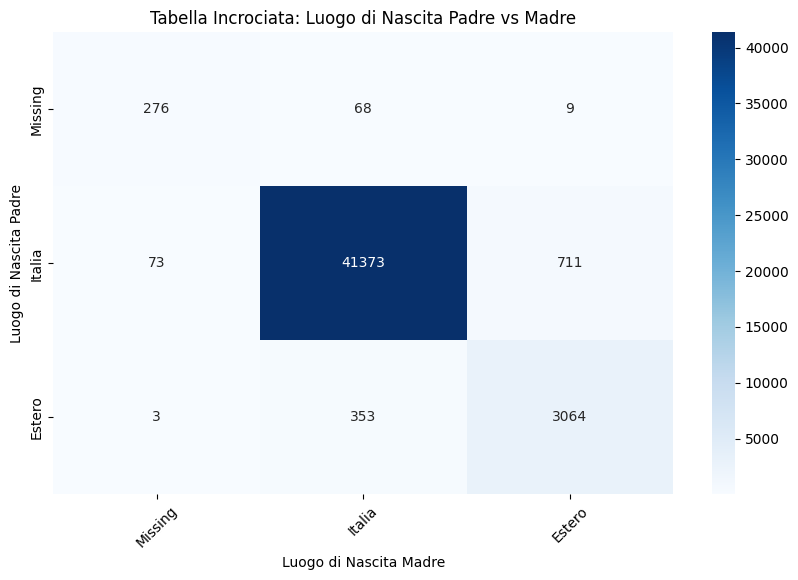

In [41]:
cross_tab_parents = pd.crosstab(
    df['BIRTHPLACEFATH2'], 
    df['BIRTHPLACEMOTH2']
)

cross_tab_parents.index = cross_tab_parents.index.map(place_map)
cross_tab_parents.columns = cross_tab_parents.columns.map(place_map)
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_parents, annot=True, fmt='d', cmap='Blues')
plt.title("Tabella Incrociata: Luogo di Nascita Padre vs Madre")
plt.xlabel("Luogo di Nascita Madre")    
plt.ylabel("Luogo di Nascita Padre")
plt.xticks(rotation=45)
plt.show()

We can get some interesting dummies here later

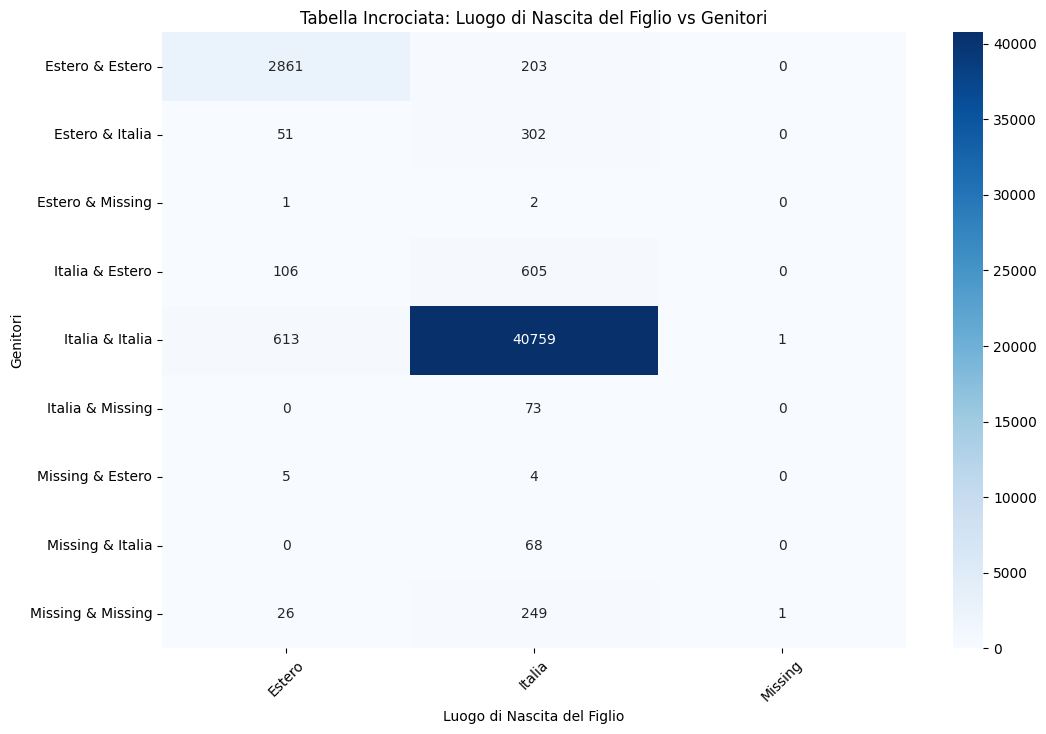

In [42]:
df_birth_all = df[['BIRTHPLACE2', 'BIRTHPLACEFATH2', 'BIRTHPLACEMOTH2']]

df_birth_all = df_birth_all.replace({
    'BIRTHPLACE2': place_map,
    'BIRTHPLACEFATH2': place_map,
    'BIRTHPLACEMOTH2': place_map
})

df_birth_all['GENITORI'] = df_birth_all['BIRTHPLACEFATH2'] + ' & ' + df_birth_all['BIRTHPLACEMOTH2']
cross_tab_kid_vs_parents = pd.crosstab(df_birth_all['GENITORI'], df_birth_all['BIRTHPLACE2'])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab_kid_vs_parents, annot=True, fmt='d', cmap='Blues')
plt.title("Tabella Incrociata: Luogo di Nascita del Figlio vs Genitori")
plt.xlabel("Luogo di Nascita del Figlio")
plt.ylabel("Genitori")
plt.xticks(rotation=45)
plt.show()

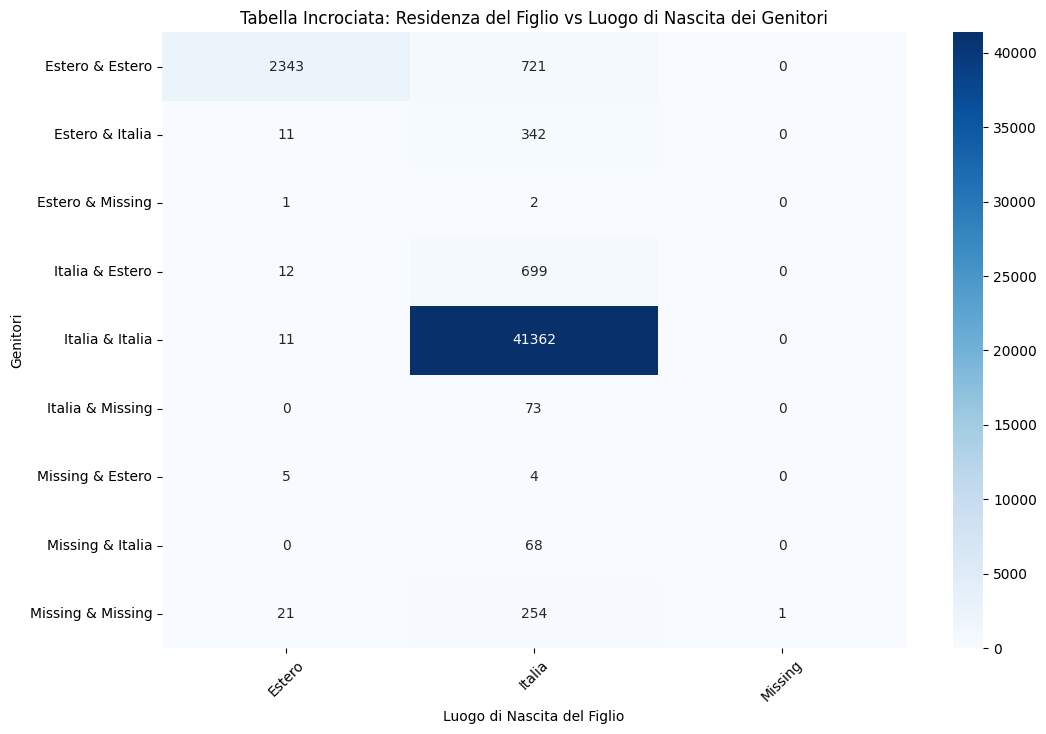

In [43]:
df_birth_all = df[['CITIZEN2', 'BIRTHPLACEFATH2', 'BIRTHPLACEMOTH2']]

df_birth_all = df_birth_all.replace({
    'CITIZEN2': place_map,
    'BIRTHPLACEFATH2': place_map,
    'BIRTHPLACEMOTH2': place_map
})

df_birth_all['GENITORI'] = df_birth_all['BIRTHPLACEFATH2'] + ' & ' + df_birth_all['BIRTHPLACEMOTH2']
cross_tab_kid_vs_parents = pd.crosstab(df_birth_all['GENITORI'], df_birth_all['CITIZEN2'])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab_kid_vs_parents, annot=True, fmt='d', cmap='Blues')
plt.title("Tabella Incrociata: Residenza del Figlio vs Luogo di Nascita dei Genitori")
plt.xlabel("Luogo di Nascita del Figlio")
plt.ylabel("Genitori")
plt.xticks(rotation=45)
plt.show()

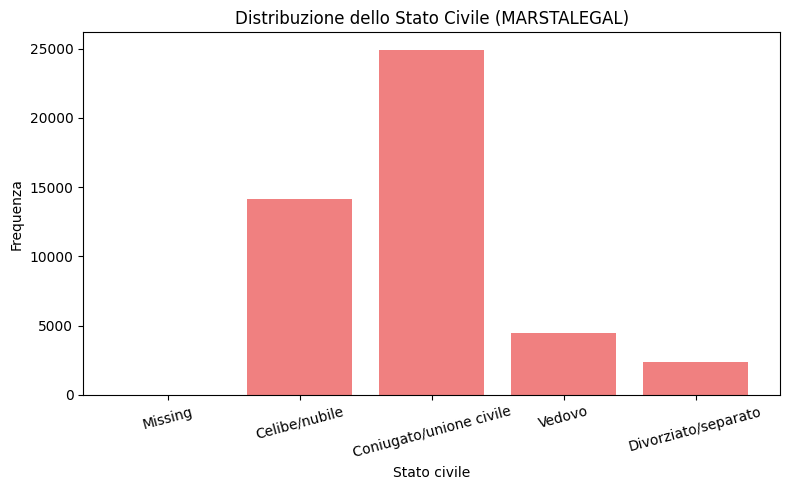

In [67]:
marital_status_labels = {
    1: "Celibe/nubile",
    2: "Coniugato/unione civile",
    3: "Vedovo",
    4: "Divorziato/separato",
   -1: "Missing"
}

marital_counts = df['MARSTALEGAL'].value_counts().sort_index()
labels = [marital_status_labels.get(code, str(code)) for code in marital_counts.index]

plt.figure(figsize=(8, 5))
plt.bar(labels, marital_counts.values, color='lightcoral')
plt.title("Distribuzione dello Stato Civile (MARSTALEGAL)")
plt.xlabel("Stato civile")
plt.ylabel("Frequenza")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [68]:
marital_counts

MARSTALEGAL
-1        6
 1    14161
 2    24936
 3     4473
 4     2354
Name: count, dtype: int64

# Condizione Socio - Economica

In [71]:
tema_scelto = "Condizione socio-economica"
df_tema_socio_economico = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_socio_economico.head()

,HATLEVEL4,MAINSTAT,POSIZ,HHINCOME,REDPR,PROBF1,ASS_SAN,BABYS,ASSIST,HCOLF,HBABYS,HASSIST,RISECO
0,2,10,2,5,1,2,1,2,2,-2,-2,-2,2
1,2,10,2,5,1,2,1,2,2,-2,-2,-2,2
2,2,20,-2,1,3,1,1,2,2,-2,-2,-2,3
3,4,10,3,1,1,1,1,2,2,-2,-2,-2,3
4,2,80,-2,1,3,1,1,2,2,-2,-2,-2,3


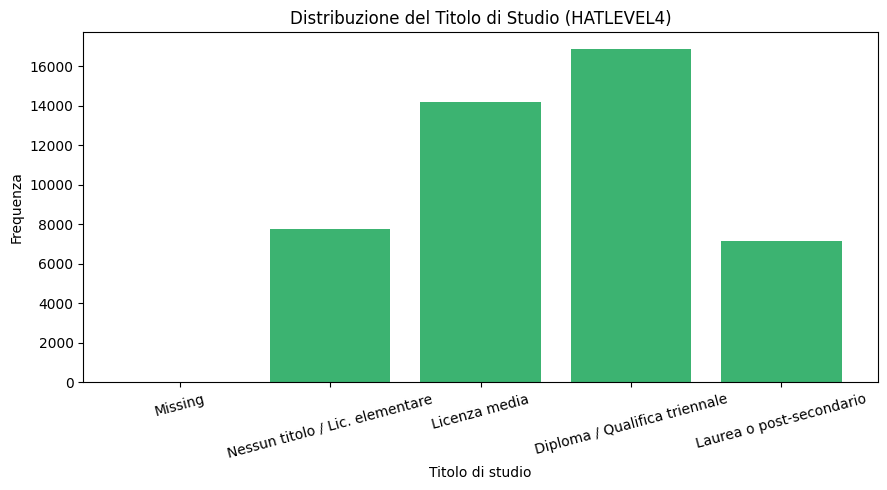

In [72]:
hatlevel_labels = {
    1: "Nessun titolo / Lic. elementare",
    2: "Licenza media",
    3: "Diploma / Qualifica triennale",
    4: "Laurea o post-secondario",
   -1: "Missing"
}

hat_counts = df_tema_socio_economico['HATLEVEL4'].value_counts().sort_index()
labels = [hatlevel_labels.get(code, str(code)) for code in hat_counts.index]

plt.figure(figsize=(9, 5))
plt.bar(labels, hat_counts.values, color='mediumseagreen')
plt.title("Distribuzione del Titolo di Studio (HATLEVEL4)")
plt.xlabel("Titolo di studio")
plt.ylabel("Frequenza")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [74]:
hat_counts 


HATLEVEL4
-1        1
 1     7740
 2    14176
 3    16875
 4     7138
Name: count, dtype: int64

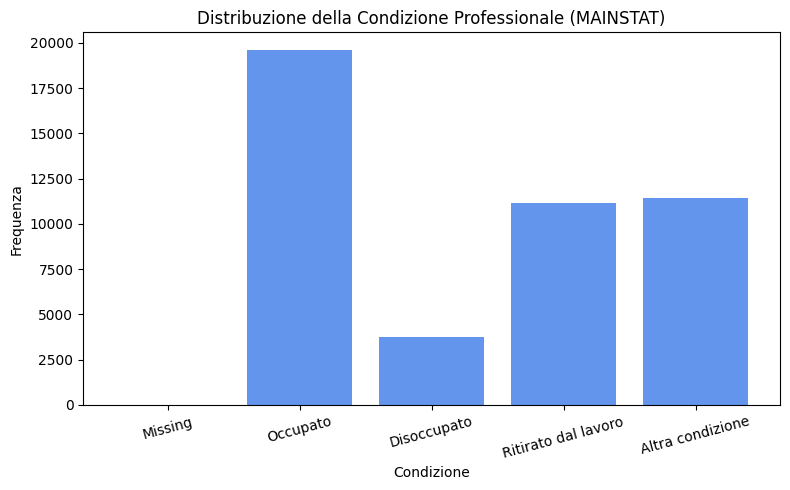

In [75]:
mainstat_labels = {
    10: "Occupato",
    20: "Disoccupato",
    30: "Ritirato dal lavoro",
    80: "Altra condizione",
    -1: "Missing"
}

# Conta e mappa etichette
mainstat_counts = df_tema_socio_economico['MAINSTAT'].value_counts().sort_index()
mainstat_names = [mainstat_labels.get(code, str(code)) for code in mainstat_counts.index]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(mainstat_names, mainstat_counts.values, color='cornflowerblue')
plt.title("Distribuzione della Condizione Professionale (MAINSTAT)")
plt.xlabel("Condizione")
plt.ylabel("Frequenza")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [76]:
mainstat_counts

MAINSTAT
-1         5
 10    19604
 20     3747
 30    11168
 80    11406
Name: count, dtype: int64

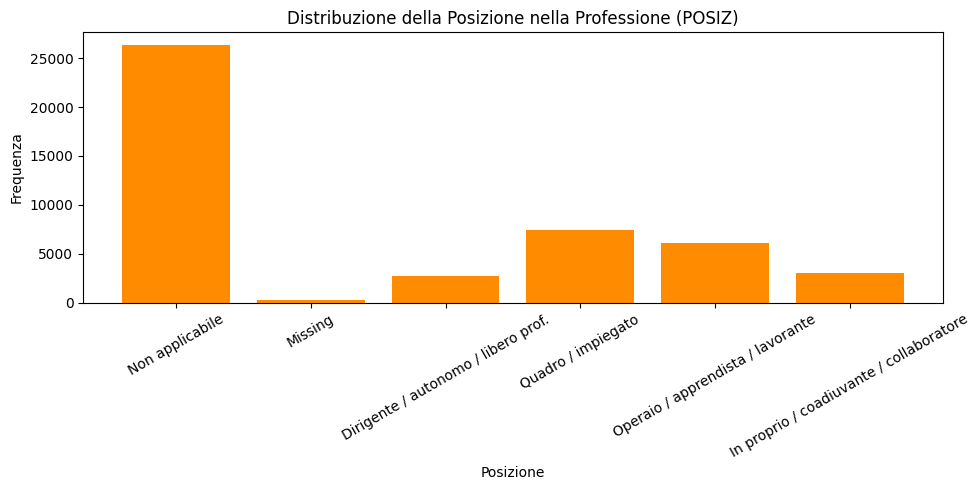

In [78]:
posiz_labels = {
    1: "Dirigente / autonomo / libero prof.",
    2: "Quadro / impiegato",
    3: "Operaio / apprendista / lavorante",
    4: "In proprio / coadiuvante / collaboratore",
   -1: "Missing",
   -2: "Non applicabile"
}

# Conta e mappa etichette
posiz_counts = df_tema_socio_economico['POSIZ'].value_counts().sort_index()
posiz_names = [posiz_labels.get(code, str(code)) for code in posiz_counts.index]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(posiz_names, posiz_counts.values, color='darkorange')
plt.title("Distribuzione della Posizione nella Professione (POSIZ)")
plt.xlabel("Posizione")
plt.ylabel("Frequenza")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [79]:
posiz_counts

POSIZ
-2    26326
-1      272
 1     2716
 2     7398
 3     6151
 4     3067
Name: count, dtype: int64

Il valore -2 = non applicabile per la variabile POSIZ si riferisce a persone per cui la domanda sulla posizione nella professione non è pertinente, cioè:

> persone che non lavorano, quindi non hanno una posizione lavorativa da indicare.



In [ ]:
19604 + 26326
# Check if employed and unemployed are consistent with the total number of people

45930

# Accesso ai servizi sanitari

In [44]:
tema_scelto = "Accesso ai servizi sanitari"
df_tema_servizi_sanitari = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_servizi_sanitari.head()

,HO12,AM1,DOVEDENT,AM2,AM3,AM4,VSTRUT,VVIC,VECO1,VFID,...,PA8,PA89,CETAPAPH,NPAPHPV,UN1A,UN1B,UN2A,UN2B,UN2C,UN2D
0,0,3,-2,1,0,-1,-2,-2,-2,-2,...,-2,-2,-2,-2,1,2,3,3,3,3
1,0,3,-2,1,0,1,1,1,2,2,...,2,2,9,2,2,2,2,2,2,3
2,0,1,2,1,2,1,1,2,1,1,...,4,3,9,2,1,1,1,2,2,2
3,2,1,2,1,0,1,1,1,1,1,...,-2,-2,-2,-2,3,3,3,3,3,3
4,0,1,2,2,-2,1,1,2,1,1,...,-2,-2,-2,-2,3,3,3,2,3,3


In [45]:
df_tema_servizi_sanitari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45930 entries, 0 to 45929
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   HO12      45930 non-null  int64
 1   AM1       45930 non-null  int64
 2   DOVEDENT  45930 non-null  int64
 3   AM2       45930 non-null  int64
 4   AM3       45930 non-null  int64
 5   AM4       45930 non-null  int64
 6   VSTRUT    45930 non-null  int64
 7   VVIC      45930 non-null  int64
 8   VECO1     45930 non-null  int64
 9   VFID      45930 non-null  int64
 10  VATT      45930 non-null  int64
 11  VSPESA    45930 non-null  int64
 12  AM6A      45930 non-null  int64
 13  AM6B      45930 non-null  int64
 14  AM64      45930 non-null  int64
 15  RISPES    45930 non-null  int64
 16  SPE       45930 non-null  int64
 17  ASTRUT    45930 non-null  int64
 18  AECO1     45930 non-null  int64
 19  AFID      45930 non-null  int64
 20  AATT      45930 non-null  int64
 21  ASPESAS   45930 non-null  int64
 22

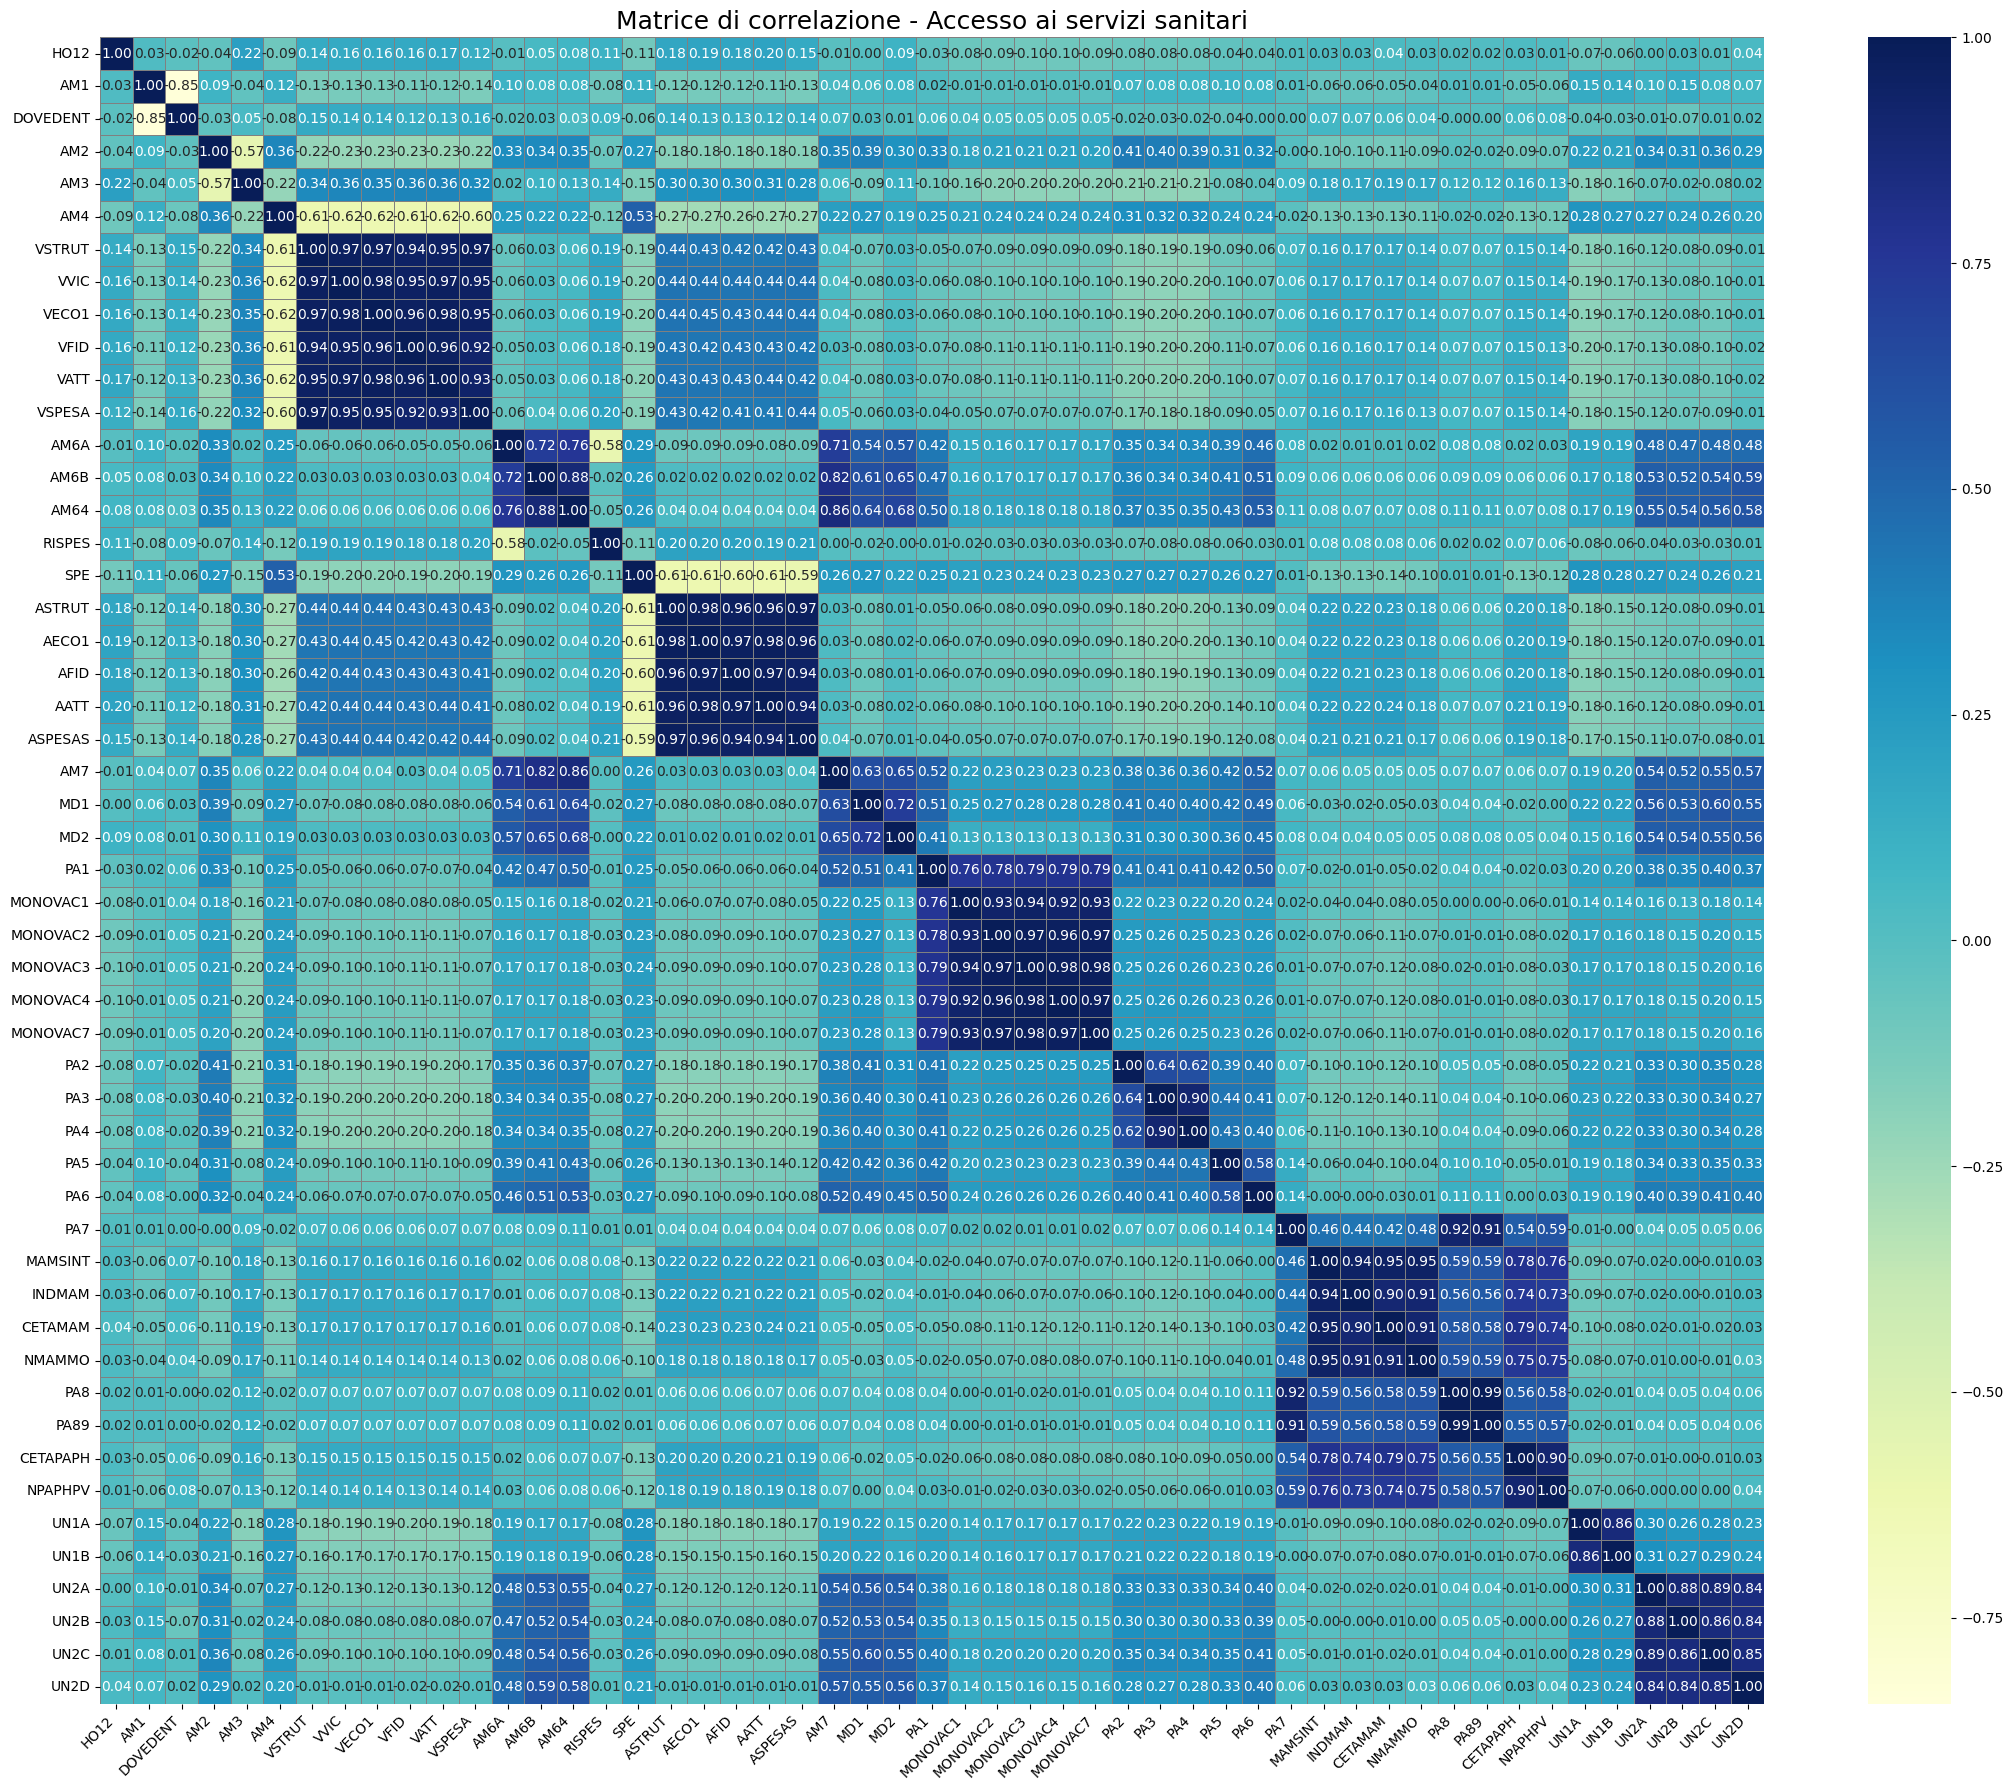

In [46]:
plt.figure(figsize=(22, 18))
sns.heatmap(
    df_tema_servizi_sanitari.corr(),
    annot=True,           # Mostra i numeri
    fmt=".2f",            # Mostra 2 decimali
    cmap="YlGnBu",        # Colormap chiara e leggibile
    linewidths=0.5,       # Linee tra le celle
    linecolor='gray'      # Colore delle linee
)
plt.title("Matrice di correlazione - Accesso ai servizi sanitari", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [47]:
# Assuming df_tema_servizi_sanitari.corr() is the symmetric matrix
correlation_matrix = df_tema_servizi_sanitari.corr()

# Set the threshold
threshold = 0.85

# Iterate through the upper triangle of the matrix (excluding the diagonal)
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        value = correlation_matrix.iloc[i, j]
        if value > threshold:
            print(f"{var1}, {var2}: {value:.2f}")

VSTRUT, VVIC: 0.97
VSTRUT, VECO1: 0.97
VSTRUT, VFID: 0.94
VSTRUT, VATT: 0.95
VSTRUT, VSPESA: 0.97
VVIC, VECO1: 0.98
VVIC, VFID: 0.95
VVIC, VATT: 0.97
VVIC, VSPESA: 0.95
VECO1, VFID: 0.96
VECO1, VATT: 0.98
VECO1, VSPESA: 0.95
VFID, VATT: 0.96
VFID, VSPESA: 0.92
VATT, VSPESA: 0.93
AM6B, AM64: 0.88
AM64, AM7: 0.86
ASTRUT, AECO1: 0.98
ASTRUT, AFID: 0.96
ASTRUT, AATT: 0.96
ASTRUT, ASPESAS: 0.97
AECO1, AFID: 0.97
AECO1, AATT: 0.98
AECO1, ASPESAS: 0.96
AFID, AATT: 0.97
AFID, ASPESAS: 0.94
AATT, ASPESAS: 0.94
MONOVAC1, MONOVAC2: 0.93
MONOVAC1, MONOVAC3: 0.94
MONOVAC1, MONOVAC4: 0.92
MONOVAC1, MONOVAC7: 0.93
MONOVAC2, MONOVAC3: 0.97
MONOVAC2, MONOVAC4: 0.96
MONOVAC2, MONOVAC7: 0.97
MONOVAC3, MONOVAC4: 0.98
MONOVAC3, MONOVAC7: 0.98
MONOVAC4, MONOVAC7: 0.97
PA3, PA4: 0.90
PA7, PA8: 0.92
PA7, PA89: 0.91
MAMSINT, INDMAM: 0.94
MAMSINT, CETAMAM: 0.95
MAMSINT, NMAMMO: 0.95
INDMAM, CETAMAM: 0.90
INDMAM, NMAMMO: 0.91
CETAMAM, NMAMMO: 0.91
PA8, PA89: 0.99
CETAPAPH, NPAPHPV: 0.90
UN1A, UN1B: 0.86
UN2A, UN

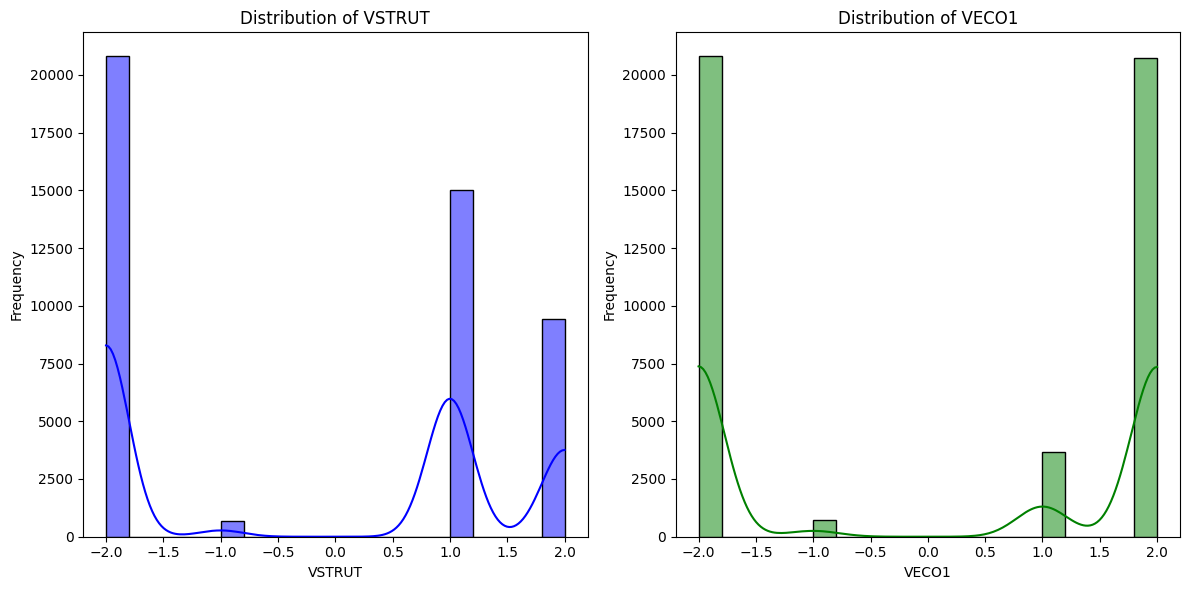

Number of identical answers: 34100
Percentage of identical answers: 74.24%


In [48]:
# Compare the distributions of VSTRUT and VECO1
plt.figure(figsize=(12, 6))

# Distribution of VSTRUT
plt.subplot(1, 2, 1)
sns.histplot(df_tema_servizi_sanitari['VSTRUT'], kde=True, bins=20, color='blue')
plt.title('Distribution of VSTRUT')
plt.xlabel('VSTRUT')
plt.ylabel('Frequency')

# Distribution of VECO1
plt.subplot(1, 2, 2)
sns.histplot(df_tema_servizi_sanitari['VECO1'], kde=True, bins=20, color='green')
plt.title('Distribution of VECO1')
plt.xlabel('VECO1')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check if they provide the same answers
same_answers = (df_tema_servizi_sanitari['VSTRUT'] == df_tema_servizi_sanitari['VECO1']).sum()
total_rows = len(df_tema_servizi_sanitari)
print(f"Number of identical answers: {same_answers}")
print(f"Percentage of identical answers: {same_answers / total_rows * 100:.2f}%")

In [49]:
# table 
df_tema_servizi_sanitari[["UN2A"]].value_counts().sort_index()
# no missing values

UN2A
-3        987
 1       2281
 2      24812
 3      17850
Name: count, dtype: int64

Questo valore non indica una risposta diretta alla domanda, ma solo il metodo di risposta.

Il valore -3 implica che la domanda non è stata posta direttamente alla persona interessata, quindi:

Non è paragonabile agli altri valori (1 = Sì, 2 = No, 3 = No, non ho avuto bisogno).

Deve essere trattato separatamente in analisi statistiche (es. escluso o analizzato come categoria distinta).

